<div>
<img src="https://www.ul.ie/themes/custom/ul/logo.jpg" />
</div>

#**MSc in Artificial Intelligence and Machine Learning**
##CS6271 - Evolutionary Algorithms and Humanoid Robotics 2023
### Kaggle Competition


Module Leader: Conor Ryan

Developer: Allan De Lima

Link to access the competition: https://www.kaggle.com/competitions/cs6271-20234-final-project

Link to join the competition: https://www.kaggle.com/t/2b316ba38c144f23ac780c8fc898b4d7



Student Name : Sajin Mohamed Pallikkathodi Erathali
Student ID : 23037601

## Introduction

Predict whether income exceeds $50K/yr based on census data. This is a shorter version of the also known as "Census Income" dataset (donated on 4/30/1996).

In [171]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

Class:

income: >50K, <=50K.


Listing of features:

age: continuous.

workclass: categorical (Private, Self-emp-not-inc, Local-gov, State-gov).

education: categorical (Bachelors, Some-college, HS-grad, Masters, Doctorate).

marital-status: categorical (Married-civ-spouse, Divorced, Never-married).

relationship: categorical (Wife, Husband, Not-in-family, Other-relative).

race: categorical (White, Asian-Pac-Islander, Black).

sex: categorical (Female, Male).

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: categorical (United-States, Others).


### Load the dataset

In [172]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [173]:
# ## mount your Google drive
# # 1) run this cell
# # 2) sign in
# # 3) verify your drive is mounted

# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

Clone the GRAPE repository at first because the dataset to be used is already there.

In [174]:
import os
# # Get the library from our BDS research Group
# # copy the path from your drive
# PATH = '/content/drive/MyDrive/grape/'

# # check if 'grape' already exists
# if os.path.exists(PATH):
#     print('grape directory already exists')
# else:
#     %cd /content/drive/MyDrive/
#     !git clone https://github.com/bdsul/grape.git
#     print('Cloning grape in your Drive')

# change directory to 'grape'

# Running on local machine as Colab timesout
%cd grape/

[Errno 2] No such file or directory: 'grape/'
/Users/Sajin/Downloads/grape


Now you have a grape folder in your Drive account.

Upload the files adult_training.csv and adult_test.csv to the folder grape/datasets in your Drive before running the next cells.

### Train set

In [175]:
train_file = 'datasets/adult_training.csv'

In [176]:
# load train set
df_train = pd.read_csv(train_file)
df_train.head()

age     workclass     education     marital-status    relationship   race    sex    capital-gain  capital-loss  hours-per-week native-country income
0  28            Private  Bachelors       Never-married  Not-in-family  White    Male        0              0            40        United-States  <=50K
1  34   Self-emp-not-inc  Bachelors  Married-civ-spouse        Husband  Black    Male        0           1887            48        United-States   >50K
2  32            Private  Bachelors       Never-married  Not-in-family  Black  Female        0              0            40        United-States  <=50K
3  46            Private  Bachelors            Divorced  Not-in-family  White    Male        0              0            40               Others  <=50K
4  44            Private  Bachelors  Married-civ-spouse        Husband  White    Male        0              0            50        United-States   >50K

In [177]:
df_train.describe()

age      capital-gain  capital-loss  hours-per-week
count  5200.000000    5200.00000   5200.000000    5200.000000 
mean     39.688077    1059.89500    109.486346      42.786538 
std      11.973363    6687.36408    442.694051      10.937644 
min      17.000000       0.00000      0.000000       1.000000 
25%      30.000000       0.00000      0.000000      40.000000 
50%      38.000000       0.00000      0.000000      40.000000 
75%      48.000000       0.00000      0.000000      48.000000 
max      90.000000   99999.00000   2559.000000      99.000000

In [178]:
X_train = df_train.copy()
# warning: cannot drop it more than once
X_train.drop(['income'], axis=1, inplace=True)

In [179]:
X_train.loc[:, ['age', 'capital-gain', 'capital-loss', 'hours-per-week']] = (X_train.loc[:, ['age', 'capital-gain', 'capital-loss', 'hours-per-week']] - X_train.loc[:, ['age', 'capital-gain', 'capital-loss', 'hours-per-week']].mean())/X_train.loc[:, ['age', 'capital-gain', 'capital-loss', 'hours-per-week']].std()
#Using oneHot encoding on categorical (non binary) features
X_train2 = pd.get_dummies(X_train, columns=['workclass', 'education', 'marital-status', 'relationship', 'race'])

print(X_train2)


         age     sex    capital-gain  capital-loss  hours-per-week native-country  workclass_Local-gov  workclass_Private  workclass_Self-emp-not-inc  workclass_State-gov  education_Bachelors  education_Doctorate  education_HS-grad  education_Masters  education_Some-college  marital-status_Divorced  marital-status_Married-civ-spouse  marital-status_Never-married  relationship_Husband  relationship_Not-in-family  relationship_Other-relative  relationship_Wife  race_Asian-Pac-Islander  race_Black  race_White
0    -0.976173    Male    -0.158492    -0.247318      -0.254766     United-States         False                True                   False                   False                 True                False               False              False                 False                   False                         False                             True                     False                     True                       False                   False                 False          

You should represent the outputs with 0 where the income is smaller or equal to 50K and with 1 if it is greater than 50K.

Follow exactly this approach, because the test targets are represented like this in the competition.

In [180]:


gender_mapping = {'Male': 1, 'Female': 0}
country_mapping = {"United-States" : 1, "Others" : 0}

# Use the 'replace' method to map the values in the 'gender' column
X_train2['sex'] = X_train2['sex'].replace(gender_mapping)
X_train2['native-country'] = X_train2['native-country'].replace(country_mapping)
print(X_train2)

         age    sex  capital-gain  capital-loss  hours-per-week  native-country  workclass_Local-gov  workclass_Private  workclass_Self-emp-not-inc  workclass_State-gov  education_Bachelors  education_Doctorate  education_HS-grad  education_Masters  education_Some-college  marital-status_Divorced  marital-status_Married-civ-spouse  marital-status_Never-married  relationship_Husband  relationship_Not-in-family  relationship_Other-relative  relationship_Wife  race_Asian-Pac-Islander  race_Black  race_White
0    -0.976173   1     -0.158492    -0.247318      -0.254766            1               False                True                   False                   False                 True                False               False              False                 False                   False                         False                             True                     False                     True                       False                   False                 False              

In [181]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

X_train2.head()

age    sex  capital-gain  capital-loss  hours-per-week  native-country  workclass_Local-gov  workclass_Private  workclass_Self-emp-not-inc  workclass_State-gov  education_Bachelors  education_Doctorate  education_HS-grad  education_Masters  education_Some-college  marital-status_Divorced  marital-status_Married-civ-spouse  marital-status_Never-married  relationship_Husband  relationship_Not-in-family  relationship_Other-relative  relationship_Wife  race_Asian-Pac-Islander  race_Black  race_White
0 -0.976173   1    -0.158492     -0.247318      -0.254766            1               False                True                   False                   False                True                 False               False              False                 False                   False                         False                             True                     False                     True                       False                   False                 False              False        True  
1 -0.475061   1    -0.158492      4.015219       0.476653            1               False               False                    True                   False                True                 False               False              False                 False                   False                          True                            False                      True                    False                       False                   False                 False               True       False  
2 -0.642098   0    -0.158492     -0.247318      -0.254766            1               False                True                   False                   False                True                 False               False              False                 False                   False                         False                             True                     False                     True                       False                   False                 False               True       False  
3  0.527164   1    -0.158492     -0.247318      -0.254766            0               False                True                   False                   False                True                 False               False              False                 False                    True                         False                            False                     False                     True                       False                   False                 False              False        True  
4  0.360126   1    -0.158492     -0.247318       0.659508            1               False                True                   False                   False                True                 False               False              False                 False                   False                          True                            False                      True                    False                       False                   False                 False              False        True

In [182]:
# class labels
l, _ = X_train.shape

y_train = np.zeros([l,], dtype=int)

for i in range(l):
  if df_train['income'].iloc[i] == '>50K':
    y_train[i] = 1
  elif df_train['income'].iloc[i] == '<=50K':
    y_train[i] = 0

In [183]:
print(y_train[0:5]) #print head

[0 1 0 0 1]


### Test set

In [184]:
test_file = 'datasets/adult_test.csv'

In [185]:
# load test set
df_test = pd.read_csv(test_file)
df_test.head()

age     workclass       education      marital-status    relationship   race    sex    capital-gain  capital-loss  hours-per-week native-country
0  33            Private       HS-grad       Never-married  Not-in-family  White    Male      3325            0             50        United-States
1  58            Private       HS-grad  Married-civ-spouse        Husband  White    Male         0            0             40        United-States
2  30   Self-emp-not-inc       HS-grad  Married-civ-spouse        Husband  White    Male         0            0             60        United-States
3  26            Private  Some-college       Never-married  Not-in-family  White  Female         0            0             20        United-States
4  43          State-gov       HS-grad       Never-married  Not-in-family  White    Male         0            0             60        United-States

In [186]:
df_test.describe()

age      capital-gain  capital-loss  hours-per-week
count  10402.000000  10402.000000  10402.000000   10402.000000 
mean      39.811575   1280.969237    106.101038      42.749567 
std       12.063746   7826.438595    438.826968      11.200949 
min       18.000000      0.000000      0.000000       1.000000 
25%       30.000000      0.000000      0.000000      40.000000 
50%       38.000000      0.000000      0.000000      40.000000 
75%       48.000000      0.000000      0.000000      48.000000 
max       90.000000  99999.000000   3683.000000      99.000000

In [187]:
X_test = df_test.copy()

In [188]:
X_test.loc[:, ['age', 'capital-gain', 'capital-loss', 'hours-per-week']] = (X_test.loc[:, ['age', 'capital-gain', 'capital-loss', 'hours-per-week']] - X_test.loc[:, ['age', 'capital-gain', 'capital-loss', 'hours-per-week']].mean())/X_test.loc[:, ['age', 'capital-gain', 'capital-loss', 'hours-per-week']].std()
#Using oneHot encoding on categorical (non binary) features
X_test2 = pd.get_dummies(X_test, columns=['workclass', 'education', 'marital-status', 'relationship', 'race'])

# mapping sex and native-country to boolean
gender_mapping = {'Male': 1, 'Female': 0}
country_mapping = {"United-States" : 1, "Others" : 0}

# Use the 'replace' method to map the values in the 'gender' column
X_test2['sex'] = X_test2['sex'].replace(gender_mapping)
X_test2['native-country'] = X_test2['native-country'].replace(country_mapping)
print(X_test2.head())


      age    sex  capital-gain  capital-loss  hours-per-week  native-country  workclass_Local-gov  workclass_Private  workclass_Self-emp-not-inc  workclass_State-gov  education_Bachelors  education_Doctorate  education_HS-grad  education_Masters  education_Some-college  marital-status_Divorced  marital-status_Married-civ-spouse  marital-status_Never-married  relationship_Husband  relationship_Not-in-family  relationship_Other-relative  relationship_Wife  race_Asian-Pac-Islander  race_Black  race_White
0 -0.564632   1     0.261170     -0.241783       0.647305            1               False                True                   False                   False                False                False                True              False                 False                   False                         False                             True                     False                     True                       False                   False                 False              False 

You will need to prepare both training and test datasets before working with a Machine Learning method.

Consider you need to use some encoding method with categorical data.

You are free to use any other pre-processing ideas.

In [189]:
#Include your code here

Convert the datasets to NumPy to easily use them.

In [190]:
# data features
X_train = X_train2.to_numpy()
X_test = X_test2.to_numpy()


## GRAPE

<div>
<img src="https://drive.google.com/uc?export=view&id=1hw43Oi3lGTCkspQ0ged2bZB8q2EpcPhz" width="150"/>
</div>

GRammatical Algorithms in Python for Evolution (GRAPE)


In [191]:
!pip install deap

import grape
import algorithms

from os import path
from deap import creator, base, tools
import random
import csv


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


You can import functions to be used with your grammar from [functions.py](https://github.com/UL-BDS/grape/blob/main/functions.py) on GRAPE repository and / or you can define your own functions.

In [192]:
from functions import add, sub, mul, pdiv, psqrt, plog, neg, and_, or_, not_, less_than_or_equal, greater_than_or_equal

'heartDisease.bnf' is a grammar used for another problem just to check if everything is working well.

Write your own grammar in a text file and save it in your Drive account.

Put the whole address on GRAMMAR_FILE and print to check it.

In [193]:
%cd /content/drive/MyDrive/

[Errno 2] No such file or directory: '/content/drive/MyDrive/'
/Users/Sajin/Downloads/grape


In [194]:
pwd

'/Users/Sajin/Downloads/grape'

In [195]:
GRAMMAR_FILE = 'adult.bnf' 

f = open("" + GRAMMAR_FILE, "r") 
print(f.read())
f.close()


<log_op> ::= <conditional_branches> | and_(<log_op>,<log_op>) | or_(<log_op>,<log_op>) | not_(<log_op>) | <boolean_feature>
<conditional_branches> ::= less_than_or_equal(<num_op>,<num_op>) | greater_than_or_equal(<num_op>, <num_op>)
<num_op>   ::= add(<num_op>,<num_op>) | sub(<num_op>,<num_op>) | mul(<num_op>,<num_op>) | pdiv(<num_op>,<num_op>) | <nonboolean_feature>
<boolean_feature> ::= x[1]|x[5]|x[6]|x[7]|x[8]|x[9]|x[10]|x[11]|x[12]|x[13]|x[14]|x[15]|x[16]|x[17]|x[18]|x[19]|x[20]|x[21]|x[22]|x[23]|x[24]
<nonboolean_feature> ::= x[0]|x[2]|x[3]|x[4]|<c><c>.<c><c>
<c>  ::= 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9


Run the following cell to put your grammar on the class Grammar.

In [196]:

BNF_GRAMMAR = grape.Grammar(path.join("", GRAMMAR_FILE))

The fitness function here is the percentage of outputs wrongly predicted.

You can write your own fitness function if you prefer.

In [197]:
def fitness_eval(individual, points):
    """
    Fitness Function
    """

    x = points[0]
    Y = points[1]

    if individual.invalid == True:
        return np.NaN,

    # Evaluate the expression
    try:
        pred = eval(individual.phenotype)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError):
        return np.NaN,
    assert np.isrealobj(pred)

    try:
        Y_class = [1 if pred[i] > 0 else 0 for i in range(len(Y))]
    except (IndexError, TypeError):
        return np.NaN,

    compare = np.equal(Y,Y_class)
    fitness = 1 - np.mean(compare)

    return fitness,

To use properly the fitness function above with GRAPE, the features must be in the lines, and the samples must be in the columns, so if your data is not like that, you need to transpose the matrix.

Take a look at the print. If you run this cell two times, the matrix will be transposed again and will not work properly.

In [198]:
X_train = np.transpose(X_train)
X_test = np.transpose(X_test)

print('Training (X,Y):\t', X_train.shape, y_train.shape)
print('Test (X):\t', X_test.shape)

Training (X,Y):	 (25, 5200) (5200,)
Test (X):	 (25, 10402)


In [199]:
print()

Set the Grammatical Evolution parameters.

Make sure you set a random seed just in case we need to re-run your experiments.

In [200]:
POPULATION_SIZE = 3000
MAX_GENERATIONS = 300
P_CROSSOVER = 0.8
P_MUTATION = 0.01
ELITE_SIZE = 1
HALLOFFAME_SIZE = 1

TOURNAMENT_SIZE = 7
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

CODON_CONSUMPTION = 'lazy'
GENOME_REPRESENTATION = 'list'
MAX_GENOME_LENGTH = None
HALL_OF_FAME_SIZE = 1

MAX_INIT_TREE_DEPTH = 10
MIN_INIT_TREE_DEPTH = 5
MAX_TREE_DEPTH = 17
MAX_WRAPS = 0
CODON_SIZE = 255

REPORT_ITEMS = ['gen', 'invalid', 'avg', 'std', 'min', 'max',
                'best_ind_length', 'avg_length',
                'best_ind_nodes', 'avg_nodes',
                'best_ind_depth', 'avg_depth',
                'avg_used_codons', 'best_ind_used_codons',
                'fitness_diversity',
                'selection_time', 'generation_time']

Create a toolbox.

In [201]:
toolbox = base.Toolbox()

# define a single objective, minimising fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create('Individual', grape.Individual, fitness=creator.FitnessMin)

toolbox.register("populationCreator", grape.sensible_initialisation, creator.Individual)

toolbox.register("evaluate", fitness_eval)

# Tournament selection:
toolbox.register("select", tools.selTournament, tournsize=TOURNAMENT_SIZE)

# Single-point crossover:
toolbox.register("mate", grape.crossover_onepoint)

# Flip-int mutation:
toolbox.register("mutate", grape.mutation_int_flip_per_codon)

In [202]:
# create initial population (generation 0):
population = toolbox.populationCreator(pop_size=POPULATION_SIZE,
                                           bnf_grammar=BNF_GRAMMAR,
                                           min_init_depth=MIN_INIT_TREE_DEPTH,
                                           max_init_depth=MAX_INIT_TREE_DEPTH,
                                           codon_size=CODON_SIZE,
                                           codon_consumption=CODON_CONSUMPTION,
                                           genome_representation=GENOME_REPRESENTATION
                                            )

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# prepare the statistics object:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)

Run Grammatical Evolution.

In [203]:
population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                              bnf_grammar=BNF_GRAMMAR,
                                              codon_size=CODON_SIZE,
                                              max_tree_depth=MAX_TREE_DEPTH,
                                              max_genome_length=MAX_GENOME_LENGTH,
                                              points_train=[X_train, y_train],
                                              codon_consumption=CODON_CONSUMPTION,
                                              report_items=REPORT_ITEMS,
                                              genome_representation=GENOME_REPRESENTATION,
                                              stats=stats, halloffame=hof, verbose=False)

gen = 0 , Best fitness = (0.2976923076923077,)
gen = 1 , Best fitness = (0.2828846153846154,) , Number of invalids = 726
gen = 2 , Best fitness = (0.2828846153846154,) , Number of invalids = 467
gen = 3 , Best fitness = (0.2828846153846154,) , Number of invalids = 271
gen = 4 , Best fitness = (0.2828846153846154,) , Number of invalids = 313
gen = 5 , Best fitness = (0.26211538461538464,) , Number of invalids = 265
gen = 6 , Best fitness = (0.2498076923076923,) , Number of invalids = 182
gen = 7 , Best fitness = (0.2498076923076923,) , Number of invalids = 106
gen = 8 , Best fitness = (0.2498076923076923,) , Number of invalids = 91
gen = 9 , Best fitness = (0.2498076923076923,) , Number of invalids = 65
gen = 10 , Best fitness = (0.2498076923076923,) , Number of invalids = 66
gen = 11 , Best fitness = (0.2498076923076923,) , Number of invalids = 47
gen = 12 , Best fitness = (0.24442307692307697,) , Number of invalids = 32
gen = 13 , Best fitness = (0.24442307692307697,) , Number of inva

jjkjjkkjjjjkjjjjjk

Show the best individual as an expression.

In [204]:
# Best individual
import textwrap
max_fitness_values, mean_fitness_values = logbook.select("max", "avg")
min_fitness_values, std_fitness_values = logbook.select("min", "std")
best = hof.items[0].phenotype
print("Best individual: \n","\n".join(textwrap.wrap(best,80)))
print("\nTraining Fitness: ", hof.items[0].fitness.values[0])
print("Depth: ", hof.items[0].depth)
print("Length of the genome: ", len(hof.items[0].genome))
print(f'Used portion of the genome: {hof.items[0].used_codons/len(hof.items[0].genome):.2f}')

Best individual: 
 and_(or_(x[20],or_(or_(x[20],greater_than_or_equal(x[2], sub(mul(x[2],add(x[3],m
ul(x[2],add(x[3],add(x[3],x[3]))))),x[2]))),or_(x[20],greater_than_or_equal(pdiv
(add(x[3],mul(x[2],add(x[0],add(x[3],x[3])))),x[2]), mul(x[2],sub(x[2],mul(x[4],
x[4]))))))),and_(or_(x[11],or_(and_(x[10],x[19]),or_(or_(x[15],greater_than_or_e
qual(x[3], mul(mul(x[2],add(x[3],mul(x[2],add(x[3],add(x[3],x[3]))))),x[2]))),or
_(x[10],x[13])))),and_(or_(x[11],or_(or_(x[15],greater_than_or_equal(x[3], mul(m
ul(x[2],add(x[3],mul(x[2],add(x[3],add(x[3],x[3]))))),x[2]))),or_(x[10],x[13])))
,and_(or_(x[11],or_(x[16],less_than_or_equal(pdiv(x[4],x[4]),x[2]))),or_(not_(x[
20]),and_(not_(x[10]),not_(x[7])))))))

Training Fitness:  0.19769230769230772
Depth:  17
Length of the genome:  3915
Used portion of the genome: 0.04


Define a function to predict values, without comparing to expected outputs.

In [205]:
def predict(individual, X):
    x = X

    if individual.invalid == True:
        return np.NaN,

    # Evaluate the expression
    try:
        pred = eval(individual.phenotype)
        print(type(pred))
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError):
        return np.NaN,
    assert np.isrealobj(pred)

    predictions = pred.astype(int)

    return predictions

Predict the classes of the test set.

Make sure you print here in the notebook you will submit to Brightspace the same predictions you used in your best submission to the Kaggle competition.

In [206]:
print(X_test.shape)
y_pred = predict(hof.items[0], X_test)
print("Predicted classes of the test set: ", y_pred)



(25, 10402)
<class 'numpy.ndarray'>
Predicted classes of the test set:  [0 0 0 ... 0 0 0]


Write a code to create a .csv with the following format:
1. First column is the index (from 0 to 10401);
2. Second column is named `income` and contains the predictions (only 0's or 1's) you  got in the previous cell with y_pred.

Example:

    index,income

    0,0

    1,0

    2,1

    ...

    10401,0


Submit it to the competition and check your score there.

In [207]:
max_fitness_values, mean_fitness_values = logbook.select("max", "avg")
min_fitness_values, std_fitness_values = logbook.select("min", "std")
fitness_test = logbook.select("fitness_test")

best_ind_length = logbook.select("best_ind_length")
avg_length = logbook.select("avg_length")

selection_time = logbook.select("selection_time")
generation_time = logbook.select("generation_time")
gen, invalid = logbook.select("gen", "invalid")
avg_used_codons = logbook.select("avg_used_codons")
best_ind_used_codons = logbook.select("best_ind_used_codons")

best_ind_nodes = logbook.select("best_ind_nodes")
avg_nodes = logbook.select("avg_nodes")

best_ind_depth = logbook.select("best_ind_depth")
avg_depth = logbook.select("avg_depth")

header = REPORT_ITEMS

results = pd.DataFrame(list(zip(gen, invalid, mean_fitness_values, std_fitness_values,
                                min_fitness_values, max_fitness_values, fitness_test,
                                best_ind_length, avg_length,
                                best_ind_nodes, avg_nodes,
                                best_ind_depth, avg_depth,
                                avg_used_codons, best_ind_used_codons,
                                selection_time, generation_time)),
               columns = header)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

display(results)

gen  invalid     avg       std       min       max   best_ind_length  avg_length  best_ind_nodes  avg_nodes  best_ind_depth  avg_depth  avg_used_codons  best_ind_used_codons  fitness_diversity  selection_time  generation_time
0      0      0    0.493489  0.122857  0.297692  0.733077       None           127        125.229667      30         26.920000        9          8.153667           83.621333               85            0.000000        10.868540   
1      1    726    0.392173  0.098519  0.282885  0.730385       None           222        118.417766       3         13.178980        5          7.222955           40.489006                8            0.011492         6.491734   
2      2    467    0.373015  0.096863  0.282885  0.724038       None           222        102.516792       3          7.457132        5          5.981430           22.525879                8            0.010440         4.503365   
3      3    271    0.359704  0.093783  0.282885  0.697308       None           222         91.130451       3          4.275559        5          4.873580           12.230854                8            0.010936         2.852295   
4      4    313    0.356761  0.092326  0.282885  0.697885       None           222        101.879747       3          5.805287        5          5.822413           16.804170                8            0.010413         3.343554   
5      5    265    0.349414  0.090973  0.262115  0.729423       None           224        110.756955       5          6.700586        6          6.740849           19.613470               14            0.010373         3.905898   
6      6    182    0.334221  0.077993  0.249808  0.713269       None            79        111.443379       6          5.808307        6          6.632943           16.980476               17            0.010637         3.051319   
7      7    106    0.318185  0.059354  0.249808  0.697692       None            79        107.070836       6          4.490325        6          6.020387           12.927091               17            0.010736         2.105253   
8      8     91    0.315645  0.057382  0.249808  0.696538       None            79        108.412169       6          4.468546        6          6.121691           12.925404               17            0.010736         2.134902   
9      9     65    0.316528  0.059652  0.249808  0.704038       None            79        113.507666       6          4.879727        6          6.507666           14.225213               17            0.011095         2.392856   
10    10     66    0.316970  0.063731  0.249808  0.728077       None            79        120.570211       6          5.926721        6          7.150307           17.372188               17            0.012713         2.477776   
11    11     47    0.316652  0.069083  0.249808  0.728269       None            79        125.091802       6          6.924119        6          7.690718           20.207317               17            0.010750         2.887152   
12    12     32    0.315323  0.073887  0.244423  0.696538       None            76        129.055593       7          7.226752        8          7.760108           20.840296               20            0.011338         3.098153   
13    13     26    0.307671  0.075176  0.244423  0.688654       None            76        130.312038       7          7.581036        8          7.789845           21.824815               20            0.011177         2.940253   
14    14     16    0.306539  0.076157  0.240577  0.728846       None            95        127.453083      11          7.514410       12          7.597520           21.870979               33            0.010289         3.292358   
15    15     32    0.305104  0.077955  0.240577  0.728269       None            95        129.414084      11          7.828167       12          7.679919           22.842992               33            0.010961         3.184039   
16    16     22    0.302494  0.077843  0.240577  0.740385       None          

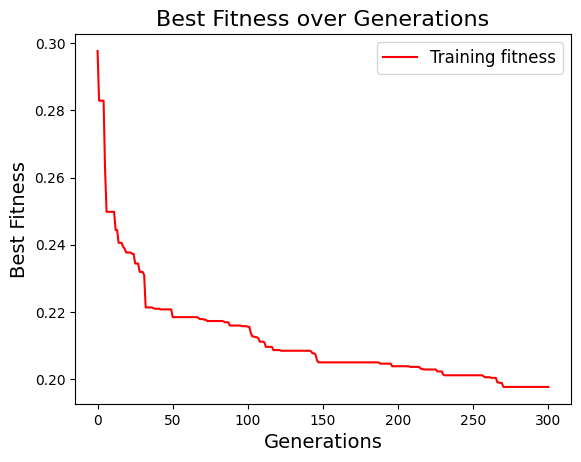

In [208]:
plt.plot(gen, min_fitness_values, color='red', label="Training fitness")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Best Fitness', fontsize=14)
plt.title('Best Fitness over Generations', fontsize=16)
plt.show()

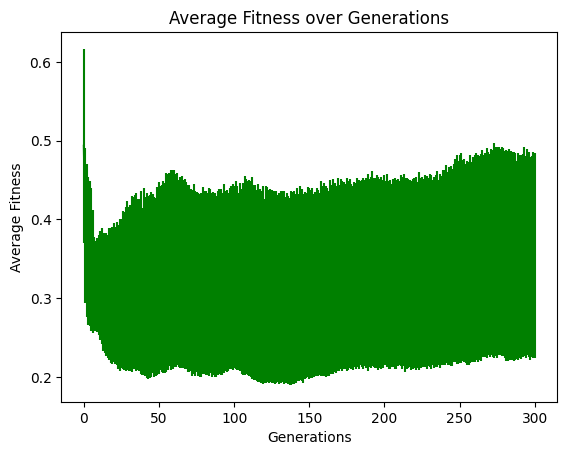

In [209]:
plt.xlabel('Generations')
plt.ylabel('Average Fitness')
plt.title('Average Fitness over Generations')
plt.errorbar(gen, mean_fitness_values, yerr=std_fitness_values,label="Best", color="Green")
plt.show()

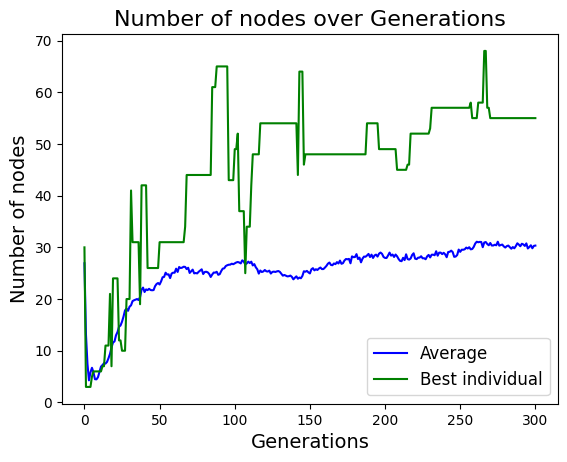

In [210]:
plt.plot(gen, avg_nodes, color='blue', label="Average")
plt.plot(gen, best_ind_nodes, color='green', label="Best individual")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Number of nodes', fontsize=14)
plt.title('Number of nodes over Generations', fontsize=16)
plt.show()

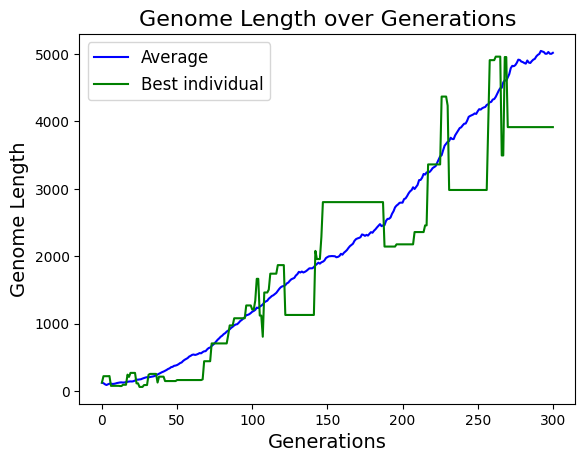

In [215]:
plt.plot(gen, avg_length, color='blue', label="Average")
plt.plot(gen, best_ind_length, color='green', label="Best individual")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Genome Length', fontsize=14)
plt.title('Genome Length over Generations', fontsize=16)
plt.show()

In [212]:
data = {
    'index': range(10402),  # The range is from 0 to 10401 (inclusive)
    'income': y_pred
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('predictions3.csv', index=False)
